In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random
import wget
import zipfile
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

In [2]:
# url = "https://storage.googleapis.com/didow-ml-datasets/a-z-handwritten-data.zip"
# url2 = "https://storage.googleapis.com/didow-ml-datasets/mnist-letter.zip"
# filename = wget.download(url)
# filename2 = wget.download(url2)

In [3]:
# local_zip = ['mnist-letter.zip', 'a-z-handwritten-data.zip']

# for i in local_zip:
#     zip_ref = zipfile.ZipFile(i, 'r')

#     zip_ref.extractall('./Dataset/')
#     zip_ref.close()

In [4]:
az_data = pd.read_csv('Dataset\A_Z Handwritten Data.csv')
emnist_train = pd.read_csv('Dataset\emnist-letters-train.csv')
emnist_test = pd.read_csv('Dataset\emnist-letters-test.csv')

In [5]:
emnist_train_labels = np.array(emnist_train.iloc[:,0].values) - 1
emnist_train_letters = np.array(emnist_train.iloc[:,1:].values)
emnist_test_labels = np.array(emnist_test.iloc[:,0].values) - 1
emnist_test_letters = np.array(emnist_test.iloc[:,1:].values)
az_data_labels = np.array(az_data.iloc[:,0].values)
az_data_letters = np.array(az_data.iloc[:,1:].values)

In [6]:
def reshape_normalize(data):
    data = data / 255.0
    data = data.reshape(len(data), 28, 28, 1)
    return data

In [7]:
def flip_rotate(data):
    data = np.fliplr(data)
    data = np.rot90(data)
    return data

In [8]:
az_data_letters = reshape_normalize(az_data_letters)
emnist_train_letters = reshape_normalize(emnist_train_letters)
emnist_test_letters = reshape_normalize(emnist_test_letters)

for i in range(len(emnist_train_letters)):
    emnist_train_letters[i] = flip_rotate(emnist_train_letters[i])

for i in range(len(emnist_test_letters)):
    emnist_test_letters[i] = flip_rotate(emnist_test_letters[i])

print(az_data_letters.shape, emnist_test_letters.shape, emnist_train_letters.shape)

(372450, 28, 28, 1) (14799, 28, 28, 1) (88799, 28, 28, 1)


In [9]:
letters = np.vstack([emnist_train_letters, emnist_test_letters, az_data_letters])
labels = np.hstack([emnist_train_labels, emnist_test_labels, az_data_labels])

In [10]:
print(letters.shape, labels.shape)

(476048, 28, 28, 1) (476048,)


In [11]:
x_train, x_val, y_train, y_val = train_test_split(letters,
                                                  labels,
                                                  test_size=0.2,
                                                  random_state=42)

In [12]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(380838, 28, 28, 1) (380838,) (95210, 28, 28, 1) (95210,)


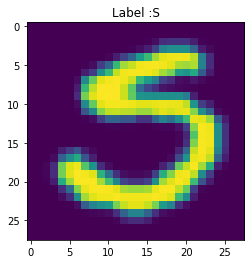

In [13]:
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

def show_image(image, label):
    image = image.reshape([28, 28])
    plt.title('Label :' + letters[label])
    plt.imshow(image)

n = random.randint(0, len(emnist_train_letters))
show_image(emnist_train_letters[n], emnist_train_labels[n])


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [15]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

Epoch 1/20
11902/11902 [==============================] - 27s 2ms/step - loss: 0.2884 - accuracy: 0.9147 - val_loss: 0.1552 - val_accuracy: 0.9536
Epoch 2/20
11902/11902 [==============================] - 24s 2ms/step - loss: 0.1632 - accuracy: 0.9498 - val_loss: 0.1297 - val_accuracy: 0.9614
Epoch 3/20
11902/11902 [==============================] - 24s 2ms/step - loss: 0.1395 - accuracy: 0.9567 - val_loss: 0.1241 - val_accuracy: 0.9621
Epoch 4/20
11902/11902 [==============================] - 26s 2ms/step - loss: 0.1271 - accuracy: 0.9601 - val_loss: 0.1182 - val_accuracy: 0.9646
Epoch 5/20
11902/11902 [==============================] - 25s 2ms/step - loss: 0.1186 - accuracy: 0.9623 - val_loss: 0.1116 - val_accuracy: 0.9673
Epoch 6/20
11902/11902 [==============================] - 24s 2ms/step - loss: 0.1130 - accuracy: 0.9639 - val_loss: 0.1144 - val_accuracy: 0.9663
Epoch 7/20
11902/11902 [==============================] - 23s 2ms/step - loss: 0.1083 - accuracy: 0.9651 - val_loss: 0

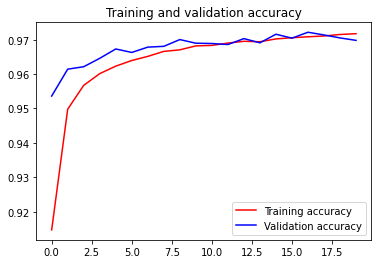

<Figure size 432x288 with 0 Axes>

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

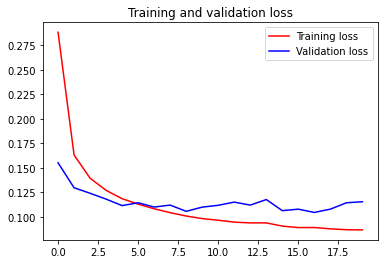

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose = 2)

print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_accuracy)

2976/2976 - 3s - loss: 0.1155 - accuracy: 0.9698 - 3s/epoch - 1ms/step
Test Loss:  0.11551997810602188
Test Accuracy:  0.9697930812835693


1/1 [==============================] - 0s 11ms/step


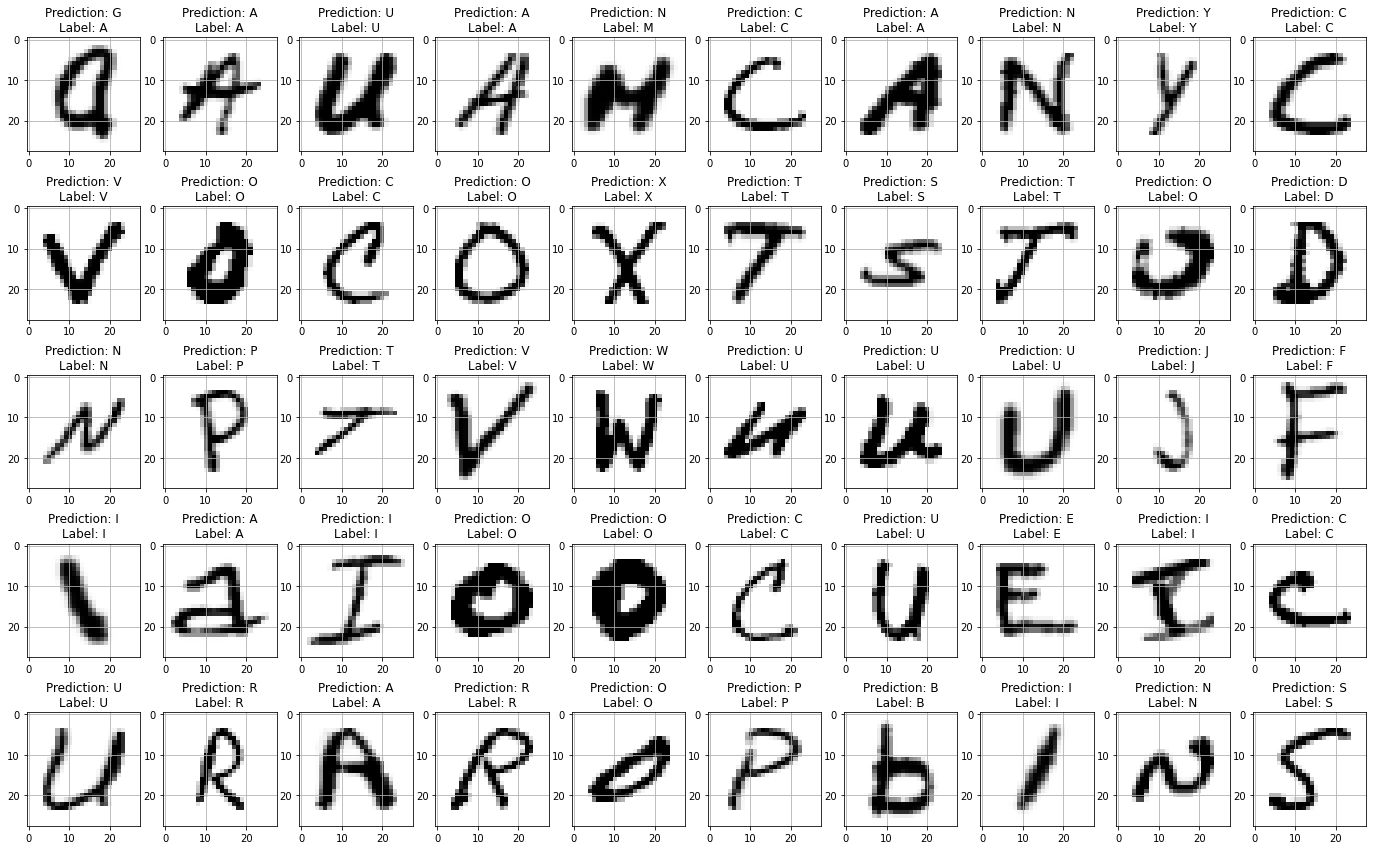

In [19]:
fig, axes = plt.subplots(5, 10, figsize=(24, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    n = random.randint(0, len(x_val))
    img = np.reshape(x_val[n], (28, 28))
    # img = np.fliplr(img)
    # img = np.rot90(img)
    ax.imshow(img, cmap="Greys")
    # reshapng it for passing into model for prediction
    img_final = np.reshape(img, (1, 28, 28, 1))
    pred = letters[np.argmax(model.predict(img_final))]
    ax.set_title("Prediction: {}\nLabel: {}".format(
        pred, letters[y_val[n]]))
    ax.grid()


In [21]:
model_version = '1'
model_name = 'combine'
file_name = 'combine_model'
file_path = "./Model/{}/{}/{}.h5".format(model_name, model_version, file_name)
model.save(file_path)